# Summary data analysis - SLC13A5 

In [39]:
import sys
import os
import operator
import numpy as np
import math as math
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import statistics
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator) 
import seaborn as sns

## Correlation between sequencing counts (Rep1 & Rep2)

In [12]:
def readCountsEnrichFile ( ifile ) :
    '''
    '''
    with open ( ifile, 'r') as f:
        o = f.read()
        f.close()
    t = o.split('\n')

    s0 ={}
    s1 ={}
    s2 ={}
    s3 ={}
    s4 ={}
    s7 ={}
    for i in range(len(t)):
        if '\t' in t[i]:
            r = t[i].split('\t')
            if 'p.' in r[0] and 'p.=' not in r[0]:
                s0[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[1]))
                s1[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[2]))
                s2[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[3]))
                s3[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[4]))
                s4[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[5]))
                s7[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[6]))
    return s0, s1, s2, s3, s4, s7

In [14]:
def correlateCounts ( sample1, sample2, coord):
    '''
    '''
    s0, s1, s2, s3, s4, s7 = readCountsEnrichFile ( sample1 )
    t0, t1, t2, t3, t4, t7 = readCountsEnrichFile ( sample2 )

    r1_0 = dict((k, s0[k]) for k in list(s0.keys() & t0.keys() ))
    r2_0 = dict((k, t0[k]) for k in list(s0.keys() & t0.keys() ))

    r1_1 = dict((k, s1[k]) for k in list(s1.keys() & t1.keys() ))
    r2_1 = dict((k, t1[k]) for k in list(s1.keys() & t1.keys() ))

    r1_2 = dict((k, s2[k]) for k in list(s2.keys() & t2.keys() ))
    r2_2 = dict((k, t2[k]) for k in list(s2.keys() & t2.keys() ))

    r1_3 = dict((k, s3[k]) for k in list(s3.keys() & t3.keys() ))
    r2_3 = dict((k, t3[k]) for k in list(s3.keys() & t3.keys() ))

    r1_4 = dict((k, s4[k]) for k in list(s4.keys() & t4.keys() ))
    r2_4 = dict((k, t4[k]) for k in list(s4.keys() & t4.keys() ))

    r1_7 = dict((k, s7[k]) for k in list(s7.keys() & t7.keys() ))
    r2_7 = dict((k, t7[k]) for k in list(s7.keys() & t7.keys() ))

    
    x0 = list(r1_0.values())
    y0 = list(r2_0.values())
    x1 = list(r1_1.values())
    y1 = list(r2_1.values())
    x2 = list(r1_2.values())
    y2 = list(r2_2.values())
    x3 = list(r1_3.values())
    y3 = list(r2_3.values())
    x4 = list(r1_4.values())
    y4 = list(r2_4.values())
    x7 = list(r1_7.values())
    y7 = list(r2_7.values())

    corr_matrix = np.corrcoef(x0, y0)
    corr = corr_matrix[0,1]
    R_sq0 = corr**2

    corr_matrix = np.corrcoef(x1, y1)
    corr = corr_matrix[0,1]
    R_sq1 = corr**2

    corr_matrix = np.corrcoef(x2, y2)
    corr = corr_matrix[0,1]
    R_sq2 = corr**2

    corr_matrix = np.corrcoef(x3, y3)
    corr = corr_matrix[0,1]
    R_sq3 = corr**2

    corr_matrix = np.corrcoef(x4, y4)
    corr = corr_matrix[0,1]
    R_sq4 = corr**2

    corr_matrix = np.corrcoef(x7, y7)
    corr = corr_matrix[0,1]
    R_sq7 = corr**2

    
    px = 1/plt.rcParams['figure.dpi']
    fig, axs = plt.subplots(2, 3, figsize=(1000*px, 500*px))
    axs[0,0].scatter(x0, y0, c ="gray", s=4) 
    axs[0,0].set_title('Input lib', fontsize=10) 
    axs[0,0].annotate("R$^2$ = {:.3f}".format(R_sq0), (0.25,3.5))
    m, b = np.polyfit(np.array(x0), np.array(y0), 1)
    axs[0,0].plot(x0, m*np.array(x0)+b, color='black')
    axs[0,0].set_xlim(0.0,4.0)
    axs[0,0].set_ylim(0.0,4.0)
    axs[0,0].xaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[0,0].xaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,0].xaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[0,0].xaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,0].yaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[0,0].yaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,0].yaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[0,0].yaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,0].grid(True, which="both")
    axs[0,0].tick_params(axis='both', which='major', labelsize=8)
    ##
    axs[0,1].scatter(x1, y1, c ="gray", s=4) 
    axs[0,1].set_title('24 hrs', fontsize=10) 
    axs[0,1].annotate("R$^2$ = {:.3f}".format(R_sq1), (0.25,3.5))
    m, b = np.polyfit(np.array(x1), np.array(y1), 1)
    axs[0,1].plot(x1, m*np.array(x1)+b, color='black')
    axs[0,1].set_xlim(0.0,4.0)
    axs[0,1].set_ylim(0.0,4.0)
    axs[0,1].xaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[0,1].xaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,1].xaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[0,1].xaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,1].yaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[0,1].yaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,1].yaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[0,1].yaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,1].grid(True, which="both")
    axs[0,1].tick_params(axis='both', which='major', labelsize=8)
    ##
    axs[0,2].scatter(x2, y2, c ="gray", s=4) 
    axs[0,2].set_title('48 hrs', fontsize=10) 
    axs[0,2].annotate("R$^2$ = {:.3f}".format(R_sq2), (0.25,3.5))
    m, b = np.polyfit(np.array(x2), np.array(y2), 1)
    axs[0,2].plot(x2, m*np.array(x2)+b, color='black')
    axs[0,2].set_xlim(0.0,4.0)
    axs[0,2].set_ylim(0.0,4.0)
    axs[0,2].xaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[0,2].xaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,2].xaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[0,2].xaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,2].yaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[0,2].yaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,2].yaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[0,2].yaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[0,2].grid(True, which="both")
    axs[0,2].tick_params(axis='both', which='major', labelsize=8)
    ##
    axs[1,0].scatter(x3, y3, c ="gray", s=4) 
    axs[1,0].set_title('72 hrs', fontsize=10) 
    axs[1,0].annotate("R$^2$ = {:.3f}".format(R_sq3), (0.25,3.5))
    m, b = np.polyfit(np.array(x3), np.array(y3), 1)
    axs[1,0].plot(x3, m*np.array(x3)+b, color='black')
    axs[1,0].set_xlim(0.0,4.0)
    axs[1,0].set_ylim(0.0,4.0)
    axs[1,0].xaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[1,0].xaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,0].xaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[1,0].xaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,0].yaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[1,0].yaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,0].yaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[1,0].yaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,0].grid(True, which="both")
    axs[1,0].tick_params(axis='both', which='major', labelsize=8)
    ##
    axs[1,1].scatter(x4, y4, c ="gray", s=4) 
    axs[1,1].set_title('96 hrs', fontsize=10) 
    axs[1,1].annotate("R$^2$ = {:.3f}".format(R_sq4), (0.25,3.5))
    m, b = np.polyfit(np.array(x4), np.array(y4), 1)
    axs[1,1].plot(x4, m*np.array(x4)+b, color='black')
    axs[1,1].set_xlim(0.0,4.0)
    axs[1,1].set_ylim(0.0,4.0)
    axs[1,1].xaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[1,1].xaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,1].xaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[1,1].xaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,1].yaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[1,1].yaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,1].yaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[1,1].yaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,1].grid(True, which="both")
    axs[1,1].tick_params(axis='both', which='major', labelsize=8)
    ##
    axs[1,2].scatter(x7, y7, c ="gray", s=4) 
    axs[1,2].set_title('168 hrs', fontsize=10) 
    axs[1,2].annotate("R$^2$ = {:.3f}".format(R_sq7), (0.25,3.5) )
    m, b = np.polyfit(np.array(x7), np.array(y7), 1)
    axs[1,2].plot(x7, m*np.array(x7)+b, color='black')
    axs[1,2].set_xlim(0.0,4.0)
    axs[1,2].set_ylim(0.0,4.0)
    axs[1,2].xaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[1,2].xaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,2].xaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[1,2].xaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,2].yaxis.set_major_locator(MultipleLocator(0.5)) 
    axs[1,2].yaxis.set_major_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,2].yaxis.set_minor_locator(MultipleLocator(0.5)) 
    axs[1,2].yaxis.set_minor_formatter(FormatStrFormatter('% 1.1f')) 
    axs[1,2].grid(True, which="both")
    axs[1,2].tick_params(axis='both', which='major', labelsize=8)

    for ax in axs.flat:
        ax.set(xlabel='log$_{10}$[Rep1 counts]', ylabel='log$_{10}$[Rep2 counts]')

    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.6,hspace=0.5)
    #plt.show()
    plt.savefig('FIGUREs/correlation_Rep1_Rep2.png', dpi=600)

In [16]:
rep1_path = './ENRICH/counts/tsv/Rep_1_sel/main_variants_counts.tsv'
rep2_path = './ENRICH/counts/tsv/Rep_2_sel/main_variants_counts.tsv'

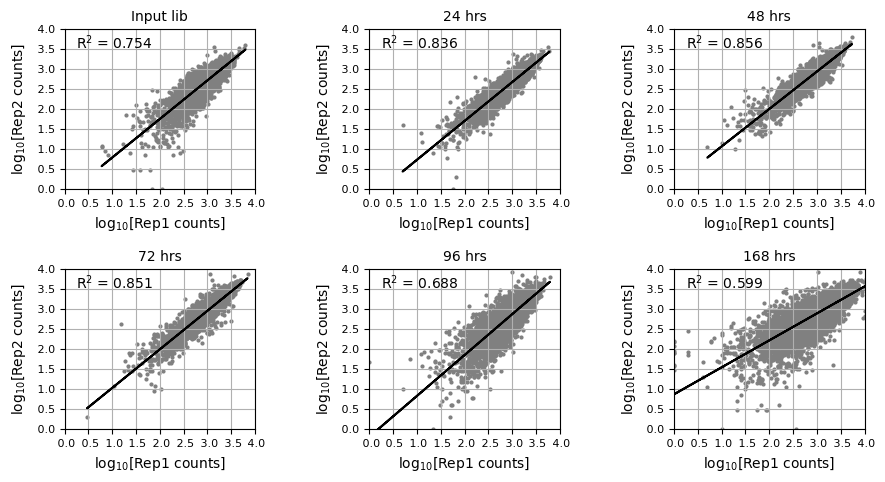

In [18]:
correlateCounts(rep1_path,rep2_path, (1,3.5)) 

### Printing out summary files from correlation between replicate counts

In [21]:
def readCounts2Print ( ifile ) :
    '''
    Read file with the following format
    	c_0	c_1	c_2	c_3	c_4	c_7
_wt	1668552.0	1604104.0	1367091.0	1415976.0	1154034.0	995723.0
c.1000G>A (p.Asp334Asn), c.1002C>T (p.Asp334Asn)	119.0	73.0	43.0	62.0	33.0	66.0
c.1000G>A (p.Asp334Ile), c.1001A>T (p.Asp334Ile)	341.0	241.0	230.0	277.0	165.0	225.0
c.1000G>A (p.Asp334Met), c.1001A>T (p.Asp334Met), c.1002C>G (p.Asp334Met)	380.0	257.0	234.0	154.0	117.0	41.0
c.1000G>C (p.Asp334Arg), c.1001A>G (p.Asp334Arg), c.1002C>G (p.Asp334Arg)	194.0	240.0	175.0	210.0	131.0	390.0
c.1000G>C (p.Asp334His)	102.0	145.0	140.0	92.0	140.0	15.0
...
    Id column separated by tabs from the rest.
    '''
    with open ( ifile, 'r') as f:
        o = f.read()
        f.close()
    t = o.split('\n')

    s0 ={}
    s1 ={}
    s2 ={}
    s3 ={}
    s4 ={}
    s7 ={}
    for i in range(len(t)):
        if '\t' in t[i]:
            r = t[i].split('\t')
            if 'p.' in r[0] and 'p.=' not in r[0]:
                s0[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[1]))
                s1[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[2]))
                s2[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[3]))
                s3[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[4]))
                s4[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[5]))
                s7[r[0].split('p.')[1].split(')')[0]] = math.log10(float(r[6]))
    return s0, s1, s2, s3, s4, s7

In [23]:
def mapXYFiles ( sample1, sample2 ): # 
    '''
    '''
    s0, s1, s2, s3, s4, s7 = readCounts2Print ( sample1 )
    t0, t1, t2, t3, t4, t7 = readCounts2Print ( sample2 )

    # intersects the variant ids from both replicate files
    r1_0 = dict((k, s0[k]) for k in list(s0.keys() & t0.keys() ))
    r2_0 = dict((k, t0[k]) for k in list(s0.keys() & t0.keys() ))

    r1_1 = dict((k, s1[k]) for k in list(s1.keys() & t1.keys() ))
    r2_1 = dict((k, t1[k]) for k in list(s1.keys() & t1.keys() ))

    r1_2 = dict((k, s2[k]) for k in list(s2.keys() & t2.keys() ))
    r2_2 = dict((k, t2[k]) for k in list(s2.keys() & t2.keys() ))

    r1_3 = dict((k, s3[k]) for k in list(s3.keys() & t3.keys() ))
    r2_3 = dict((k, t3[k]) for k in list(s3.keys() & t3.keys() ))

    r1_4 = dict((k, s4[k]) for k in list(s4.keys() & t4.keys() ))
    r2_4 = dict((k, t4[k]) for k in list(s4.keys() & t4.keys() ))

    r1_7 = dict((k, s7[k]) for k in list(s7.keys() & t7.keys() ))
    r2_7 = dict((k, t7[k]) for k in list(s7.keys() & t7.keys() ))

    
    x0 = list(r1_0.values())
    y0 = list(r2_0.values())
    x1 = list(r1_1.values())
    y1 = list(r2_1.values())
    x2 = list(r1_2.values())
    y2 = list(r2_2.values())
    x3 = list(r1_3.values())
    y3 = list(r2_3.values())
    x4 = list(r1_4.values())
    y4 = list(r2_4.values())
    x7 = list(r1_7.values())
    y7 = list(r2_7.values())

    return x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x7,y7

In [27]:
x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x7,y7 = mapXYFiles ( rep1_path, rep2_path )

In [29]:
# 0 - Input Library
with open('./ENRICH/replicates/data_InputLib.txt', 'w') as f:
    for i in range(len(x0)):
        f.write('%lf\t%lf\n' % (x0[i], y0[i]))
    f.close()

# 1 - 24hrs
with open('./ENRICH/replicates/data_24hrs.txt', 'w') as f:
    for i in range(len(x1)):
        f.write('%lf\t%lf\n' % (x1[i], y1[i]))
    f.close()

# 2 - 48hrs
with open('./ENRICH/replicates/data_48hrs.txt', 'w') as f:
    for i in range(len(x2)):
        f.write('%lf\t%lf\n' % (x2[i], y2[i]))
    f.close()

# 3 - 72hrs
with open('./ENRICH/replicates/data_72hrs.txt', 'w') as f:
    for i in range(len(x3)):
        f.write('%lf\t%lf\n' % (x3[i], y3[i]))
    f.close()

# 4 - 96hrs
with open('./ENRICH/replicates/data_96hrs.txt', 'w') as f:
    for i in range(len(x4)):
        f.write('%lf\t%lf\n' % (x4[i], y4[i]))
    f.close()

# 7 - 168hrs
with open('./ENRICH/replicates/data_168hrs.txt', 'w') as f:
    for i in range(len(x7)):
        f.write('%lf\t%lf\n' % (x7[i], y7[i]))
    f.close()


## Scoring from regression

In [1]:
import sys
import os
import operator
import numpy as np
import math as math
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import statistics
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator) 
from scipy.stats import norm

In [2]:
def readAverageScores ( ifile ) :
    '''
    '''
    with open ( ifile, 'r') as f:
        o = f.read()
        f.close()
    t = o.split('\n')

    s ={}
    e ={}
    for i in range(len(t)):
        if '\t' in t[i]:
            r = t[i].split('\t')
            if 'p.' in r[0] and 'p.=' not in r[0]:
                s[r[0].split('p.')[1].split(')')[0]] = float(r[3])
                e[r[0].split('p.')[1].split(')')[0]] = float(r[1])
    return s, e 

mu_1, std_1, lambda_1:  [-0.98971381  0.22646212  0.36873814] 
 [0.0051949  0.00541799 0.00751732]
mu_2, std_2, lambda_2:  [0.00303573 0.28445843 0.62842946] 
 [0.00425114 0.00454861 0.00835262]


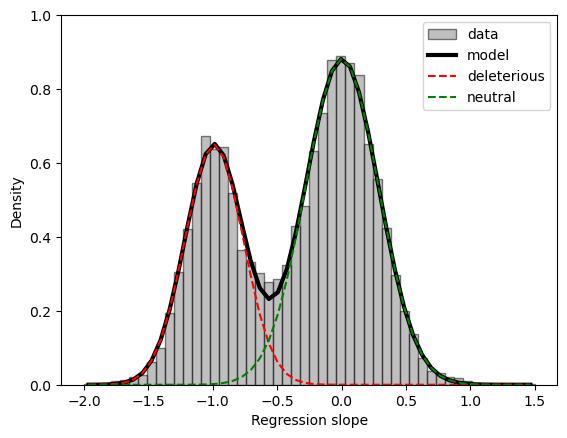

In [5]:
from pylab import *
from scipy.optimize import curve_fit
import math

scores = './ENRICH/counts/tsv/13A5_joined_exp/main_variants_scores.tsv'    
s1, e1 = readAverageScores ( scores )

#fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
data = list(s1.values())
for i in range(len(data)):
    data[i] = data[i]*(-1.0)
    
y,x,_=hist(data,50,alpha=.5,label='data', color = "grey", edgecolor='black',lw=1, range=[-2,1.5], density=True)
plt.ylim((0.0,1.0))
plt.xlabel('Regression slope')
plt.ylabel('Density')
plt.grid()

x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

def gauss(x,mu,sigma,A):
    return A*(1/(sigma*math.sqrt(2*math.pi)))*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2, A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected=(-1.0,0.2,0.8,0.0,.2, 0.8)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='black',lw=3,label='model')
plot(x,gauss(x,*params[0:3]),color='red',lw=1.5, linestyle='dashed',label='deleterious')
plot(x,gauss(x,*params[3:6]),color='green',lw=1.5, linestyle='dashed',label='neutral')

legend()
plt.grid()

plt.savefig('score_model.png')
print("mu_1, std_1, lambda_1: ",params[0:3],'\n',sigma[0:3]) 
print("mu_2, std_2, lambda_2: ",params[3:6],'\n',sigma[3:6]) 

In [7]:
## saving scores and error
with open('./ENRICH/scores/13a5_scores.txt', 'a') as f:
    for i,j in s1.items():
        if i in e1:
            f.write('%s\t%lf\t%lf\n' % (i, (-1)*j, e1[i]))
    f.close()
    

In [9]:
# Obtain probability of deleterious or neutral variant:
def prob_gauss(s,mu,sigma):
    return (1/(sigma*math.sqrt(2*math.pi)))*exp(-(s-mu)**2/2/sigma**2)

# Deleterious parameters:
print("Deleteriour mode:","\n","mu_1, std_1, lambda_1: ","\t",params[0:3],'\t',sigma[0:3]) 
# Neutral parameters:
print("Neutral mode:","\n","mu_2, std_2, lambda_2: ","\t",params[3:6],'\t',sigma[3:6]) 



Deleteriour mode: 
 mu_1, std_1, lambda_1:  	 [-0.98971381  0.22646212  0.36873814] 	 [0.0051949  0.00541799 0.00751732]
Neutral mode: 
 mu_2, std_2, lambda_2:  	 [0.00303573 0.28445843 0.62842946] 	 [0.00425114 0.00454861 0.00835262]


### Calculating probability of del or neutral variant given score+/-SE

In [12]:
# To calculate the integrals
from scipy.integrate import quad
from colorama import Fore
import re
aaa = {'Ala':'A','Cys':'C','Asp':'D','Glu':'E','Phe':'F','Gly':'G','His':'H','Ile':'I','Lys':'K','Leu':'L',
       'Met':'M','Asn':'N','Pro':'P','Gln':'Q','Arg':'R','Ser':'S','Thr':'T','Val':'V','Trp':'W','Tyr':'Y', 'Ter':'X'}

DEL_PROB = 0.5
prob = {}

T_neutral = 0.0
T_deleterious = 0.0
T_gof = 0.0
with open('./DATA/prob_deleterious.txt', 'w') as f:
    for i,j in s1.items():
        if i in e1:
            match = re.match(r"([a-z]+)([0-9]+)([a-z]+)", i, re.I)
            neu_prob = quad(prob_gauss, -j-e1[i], -j+e1[i], args=(0.003,0.284))
            del_prob = quad(prob_gauss, -j-e1[i], -j+e1[i], args=(-0.989,0.226))
            LR = del_prob[0]/neu_prob[0]
            p = LR/(LR+1)
            if match:
                ids = match.groups()
                if aaa[ids[2]]:# == 'X':
                    prob[aaa[ids[0]]+"_"+ids[1]+"_"+aaa[ids[2]]] = p
                    if p > DEL_PROB:
                        ## Deleterious
                        T_deleterious+=1.0
                        print (Fore.RED, "{}\t{}\t{}\t{:0<10.5g}\t{:0<10.5g}\t{:0<10.5g}\t{:0<10.5g}\tdel".format(aaa[ids[0]],ids[1],aaa[ids[2]], -j,e1[i], LR, p))
                        f.write("{}\t{}\t{}\t{:0<10.5g}\t{:0<10.5g}\t{:0<10.5g}\t{:0<10.5g}\tdel\n".format(aaa[ids[0]],ids[1],aaa[ids[2]], -j,e1[i], LR, p))
                    elif (-j) > (0.003+1.96*0.284):
                        ## Gain of function
                        T_neutral+=1.0
                        T_gof+=1.0
                        print (Fore.BLUE, "{}\t{}\t{}\t{:0<10.6g}\t{:0<10.6g}\t{:0<10.5g}\t{:0<10.5g}\tgof".format(aaa[ids[0]],ids[1],aaa[ids[2]], -j,e1[i], LR, p))
                        f.write("{}\t{}\t{}\t{:0<10.5g}\t{:0<10.5g}\t{:0<10.5g}\t{:0<10.5g}\tgof\n".format(aaa[ids[0]],ids[1],aaa[ids[2]], -j,e1[i], LR, p))
                    else:
                        ## Neutral
                        T_neutral+=1
                        print (Fore.GREEN, "{}\t{}\t{}\t{:0<10.5g}\t{:0<10.5g}\t{:0<10.5g}\t{:0<10.5g}\tneu".format(aaa[ids[0]],ids[1],aaa[ids[2]], -j,e1[i], LR, p))
                        f.write("{}\t{}\t{}\t{:0<10.5g}\t{:0<10.5g}\t{:0<10.5g}\t{:0<10.5g}\tneu\n".format(aaa[ids[0]],ids[1],aaa[ids[2]], -j,e1[i], LR, p))
    f.close()


 D	334	N	0.39491000	0.40087000	1.3366e-05	1.3366e-05	neu
 D	334	I	-0.1736400	0.21577000	0.00845810	0.00838710	neu
 D	334	M	0.85334700	0.72717400	1.2099e-06	1.2099e-06	gof
 D	334	R	-0.5838100	0.68338000	1.40710000	0.58456000	del
 D	334	H	-0.5593600	0.36990000	1.59190000	0.61419000	del
 D	334	L	-0.8323400	0.38475000	14.8370000	0.93686000	del
 D	334	C	-0.8017400	0.46029000	7.85500000	0.88707000	del
 D	334	F	0.95297000	0.32706900	3.1691e-11	3.1691e-11	gof
 D	334	S	-0.7773700	0.49303000	5.72820000	0.85137000	del
 D	334	X	-1.2770000	0.86503000	13.8170000	0.93251000	del
 D	334	Y	-0.0757680	0.65613000	0.13103000	0.11585000	neu
 D	334	V	-0.5382200	0.45890000	1.33320000	0.57141000	del
 D	334	E	0.60054200	0.54848300	4.7472e-06	4.7472e-06	gof
 P	335	N	-0.0088640	0.22073000	0.00069216	0.00069168	neu
 P	335	I	-0.5972100	0.25607000	2.43900000	0.70922000	del
 P	335	K	-0.7514500	0.75105000	1.99600000	0.66622000	del
 P	335	M	-0.2961300	0.15650000	0.03444100	0.03329400	neu
 P	335	A	-0.2056600	0.12929000	

In [14]:
prob

{'D_334_N': 1.3365926504788366e-05,
 'D_334_I': 0.008387115058956634,
 'D_334_M': 1.20992897041621e-06,
 'D_334_R': 0.5845642834240333,
 'D_334_H': 0.6141874358235907,
 'D_334_L': 0.9368579338426293,
 'D_334_C': 0.8870698150492705,
 'D_334_F': 3.16911110235801e-11,
 'D_334_S': 0.8513716851023881,
 'D_334_X': 0.9325106356111428,
 'D_334_Y': 0.11585082390442517,
 'D_334_V': 0.5714077953130212,
 'D_334_E': 4.747176271911286e-06,
 'P_335_N': 0.0006916842871111478,
 'P_335_I': 0.7092169988377114,
 'P_335_K': 0.6662195770016548,
 'P_335_M': 0.033294254610018476,
 'P_335_A': 0.006822257422197274,
 'P_335_D': 0.0007863784773997215,
 'P_335_E': 0.8664494054723948,
 'P_335_G': 0.00011249163776578137,
 'P_335_V': 9.838460150579355e-07,
 'P_335_C': 3.04426917272294e-08,
 'P_335_F': 5.893531759236723e-05,
 'P_335_S': 0.04748251075405251,
 'P_335_X': 0.9658918438022771,
 'P_335_W': 0.03129932311217427,
 'P_335_Y': 0.007044472254336441,
 'P_335_Q': 3.1405274317469105e-05,
 'P_335_H': 0.56590723391900

### Summary

In [17]:
print("Total: {} ({:6.3f}%)".format(T_deleterious+T_neutral, 100*(T_deleterious+T_neutral)/(568*19)))
print(Fore.RED, "Deleterious:      {} ({:6.3f}%)".format(T_deleterious, 100*(T_deleterious)/(568*19)))
print(Fore.GREEN, "Neutral:          {} ({:6.3f}%)".format(T_neutral, 100*(T_neutral)/(568*19)))
print(Fore.BLUE, "Gain-of-function: {} ({:6.3f}%)".format(T_gof, 100*(T_gof)/(568*19)))

Total: 9719.0 (90.057%)
 Deleterious:      3767.0 (34.905%)
 Neutral:          5952.0 (55.152%)
 Gain-of-function: 182.0 ( 1.686%)


### Plotting Standard error too

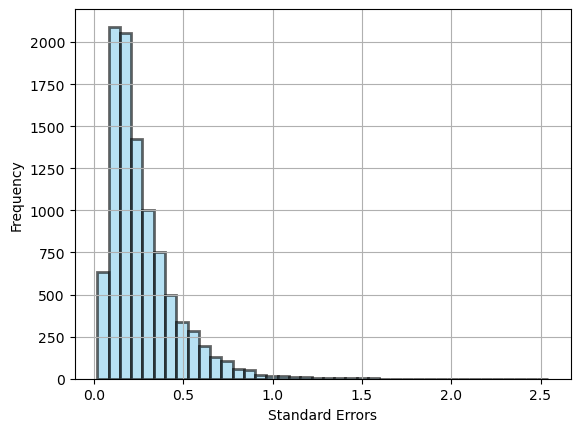

In [21]:
scores = './ENRICH/counts/tsv/13A5_joined_exp/main_variants_scores.tsv'    
s1, e1 = readAverageScores ( scores )
# Generate some data for this 
# demonstration.
data = list(e1.values())
 
# Fit a normal distribution to
# the data:
# mean and standard deviation
# mu, std = norm.fit(data) 
 
# Plot the histogram.
plt.hist(data, bins=40, alpha=0.6, color = "skyblue", edgecolor='black',lw=2)
 
# Plot the PDF.
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#p = norm.pdf(x, mu, std)
 
#plt.plot(x, p, 'k', linewidth=2)
#title = "Mean: {:.2f}; Std {:.2f}".format(mu, std)
plt.xlabel('Standard Errors')
plt.ylabel('Frequency')
plt.grid()
#plt.title(title)
 
plt.show()

### Exploring variants stability, surface accessibility and pathogenicity  

#### Reading summary files

In [25]:
def readSummaryFile ( ifile ):
    '''
site wtAA mutAA Stability SE   CIL    CIU   EvolCov EvolS   Score   ScoreSE aMiss     LR    probDel RSA EvolRate
2	A	C	0.1308	0.3566	-0.1817	0.4434	0.8185	3.5415	0.0765	0.2843	0.5244	0.0004	0.0004  1    xx
2	A	D	-0.4841	0.1359	-0.6033	-0.3650	0.8185	3.5415	-0.2768	0.1103	0.1664	0.0196	0.0192  -1   xx
2	A	E	-0.4972	0.0248	-0.5189	-0.4754	0.8185	3.5415	-0.4184	0.1489	0.1683	0.2069	0.1715  0    xx
2	A	F	-0.6380	0.0168	-0.6527	-0.6233	0.8185	3.5415	-0.2984	0.1571	0.2908	0.0358	0.0346  0    xx
    '''
    d = {}
    with open ( ifile, 'r') as f:
        o = f.read()
        f.close()
    r = o.split('\n')

    for i in range(len(r)):
        if r[i]:
            t = r[i].split('\t')
            s = t[1] + "_" + t[0] + "_" + t[2]
            #       Stability SE   EvolCov EvolS   Score   ScoreSE aMiss     LR    probDel RSA EvolRate
            d[s] = ( t[3], t[4], t[7], t[8], t[9], t[10], t[11], t[12], t[13], t[14], t[15])
    return d

In [27]:
summary = readSummaryFile ( './DATA/summary_data.txt' )

#### Reading annotated variants from GnomAD

In [31]:
def readGnomadVariants ( d, ifile, annotation ):
    '''
    '''
    import re
    aaa = {'Ala':'A','Cys':'C','Asp':'D','Glu':'E','Phe':'F','Gly':'G','His':'H','Ile':'I','Lys':'K','Leu':'L',
       'Met':'M','Asn':'N','Pro':'P','Gln':'Q','Arg':'R','Ser':'S','Thr':'T','Val':'V','Trp':'W','Tyr':'Y', 'Ter':'X'}

    with open ( ifile, 'r') as f:
        o = f.read()
        f.close()
    t = o.split('\n')

    for i in range(len(t)):
        if t[i]:
            string = t[i].split('.')[1]
            match = re.match(r"([a-z]+)([0-9]+)([a-z]+)", string, re.I)
            if match:
                ids = match.groups()
                s = aaa[ids[0]] + "_" + ids[1] + "_" + aaa[ids[2]]
                d[s] = annotation 
    return d

In [33]:
pathogenic = './DATA/GNOMAD/pathogenic.txt'
benign = './DATA/GNOMAD/benign.txt'
vus = './DATA/GNOMAD/VUS.txt'

var = {}
path = readGnomadVariants ( var, pathogenic, 'pathogenic' )
var = readGnomadVariants ( var, benign, 'benign' )
var = readGnomadVariants ( var, vus, 'vus' )

#### Reading surface accessibility

In [35]:
def readRSA ( ifile ):
    '''
    '''
    with open ( ifile, 'r') as f:
        o = f.read()
        f.close()
    t = o.split('\n')

    r = {}
    for i in range(len(t)):
        if t[i]:
            s = t[i].split('\t')
            if float(s[3]) <= 25:
                r[s[0]+"_"+s[2]] = 'buried'
            else:
                r[s[0]+"_"+s[2]] = 'exposed'
    return r

In [41]:
rsa = readRSA ( './DATA/RSA/slc13a5.rsa' )

#### Putting together the data in a single dataframe

In [44]:
data = {}
data['ID'] = list()
data['RSA'] = list()
data['P'] = list()
data['Stability'] = list()
data['FloatStability'] = list()
data['EvolCon'] = list()
data['alphaMiss'] = list()
data['Score'] = list()
data['ScoreSE'] = list()
data['DVol'] = list()
data['EvolRate'] = list()

#           0      1      2      3       4        5     6        7      8        9
#       Stability SE   EvolCov EvolS   Score   ScoreSE aMiss     LR    probDel  RSA
# d[s] = ( t[3], t[4], t[7], t[8], t[9], t[10], t[11], t[12], t[13], t[14])
## Amino acid volume, from Zamyatnin, A.A., Protein volume in solution, Prog. Biophys. Mol. Biol., 24:107-123 (1972), PMID: 4566650.
dvol = {'A':88.6, 'R':173.4, 'N':114.1, 'D':111.1, 'C':108.5, 'Q':143.8, 'E':138.4, 'G':60.1,
        'H':153.2, 'I':166.7, 'L':166.7, 'K':168.6, 'M':162.9, 'F':189.9, 'P':112.7, 'S':89.0,
        'T':116.1, 'W':227.8, 'Y':193.6, 'V':140.0 }

for i,j in summary.items():
    if float(j[8]) >= 0.0 and float(j[8])<=1.0:
        data['ID'].append(i)
        data['P'].append(float(j[8]))
        data['Score'].append(float(j[4]))
        data['ScoreSE'].append(float(j[5]))
        data['FloatStability'].append(float(j[0]))
        #calculating change in volume
        wtaa = str(i.split('_')[0])
        mutaa = str(i.split('_')[2])
        data['DVol'].append(float(dvol[mutaa])-float(dvol[wtaa]))
        if int(j[9]) == 1:
            data['RSA'].append('Exposed')
        elif int(j[9]) == -1:
            data['RSA'].append('Buried')
        elif int(j[9]) == 0:
            data['RSA'].append('ND')
        if float(j[0]) >= 5.0:
            data['Stability'].append('Unstable')
        elif float(j[0]) <= -5.0:
            data['Stability'].append('Unstable')
        elif float(j[0]) > -5.0 and float(j[0]) < 5.0:
            data['Stability'].append('Stable')            
        if float(j[2]) > 0.5:
            data['EvolCon'].append('Conserved')
        else:
            data['EvolCon'].append('NotConserved')
        if float(j[6]) < 0.34:
            data['alphaMiss'].append('Benign')
        elif float(j[6]) > 0.56:
            data['alphaMiss'].append('Pathogenic')
        else:
            data['alphaMiss'].append('Uncertain')
        if float(j[10]) > 1.0:
            data['EvolRate'].append('Fast')
        elif float(j[10]) < (-1.0):
            data['EvolRate'].append('Slow')
        else:
            data['EvolRate'].append('Average')

In [46]:
# Create DataFrame
df = pd.DataFrame(data)
df

,ID,RSA,P,Stability,FloatStability,EvolCon,alphaMiss,Score,ScoreSE,DVol,EvolRate
0,A_2_C,ND,0.0004,Stable,0.1308,Conserved,Uncertain,0.0765,0.2843,19.9,Average
1,A_2_D,ND,0.0192,Stable,-0.4841,Conserved,Benign,-0.2768,0.1103,22.5,Average
2,A_2_E,ND,0.1715,Stable,-0.4972,Conserved,Benign,-0.4184,0.1489,49.8,Average
3,A_2_F,ND,0.0346,Stable,-0.6380,Conserved,Benign,-0.2984,0.1571,101.3,Average
4,A_2_G,ND,0.0000,Stable,1.4664,Conserved,Benign,0.5231,0.2741,-28.5,Average
...,...,...,...,...,...,...,...,...,...,...,...
9176,T_568_I,ND,0.0001,Stable,0.1429,NotConserved,Benign,0.2219,0.3426,50.6,Average
9177,T_568_N,ND,0.0000,Stable,-0.0216,NotConserved,Benign,0.3997,0.2446,-2.0,Average
9178,T_568_R,ND,0.0486,Stable,-0.0489,NotConserved,Benign,-0.2276,0.3439,57.3,Average
9179,T_568_S,ND,0.0011,Stable,0.1233,NotConserved,Benign,0.0670,0.3461,-27.1,Average


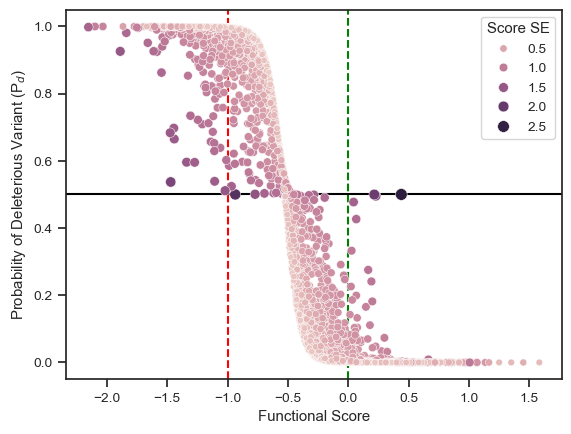

In [48]:
sns.set(style='ticks', font_scale=0.9)
#sns.set_context("talk")
g = sns.scatterplot(x="Score", y="P", data=df, hue="ScoreSE", size="ScoreSE" )#, legend="full")
g.set(xlabel ="Functional Score", ylabel = "Probability of Deleterious Variant (P$_d$)", title ='')
g.legend(title='Score SE', loc='upper right')
g.axvline(x=0, c='green', linestyle='dashed', zorder=0)
g.axvline(x=-1, c='red', linestyle='dashed', zorder=0)
g.axhline(y=0.5, c='black', linestyle='solid', zorder=0)
g.set_rasterized(True)
plt.savefig("./FIGUREs/Score_ProbDel.png")
plt.savefig("./FIGUREs/Score_ProbDel.eps")

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/var/folders/dn/s7cvtl7d36v8bpxxwgts5x5m0000gn/T/ipykernel_23635/2739472175.py:5: SyntaxWarning: invalid escape sequence '\D'
  g.set(xlabel ="$\Delta$Stability", ylabel = "$\Delta$Aminoacid Volume", title ='')
/var/folders/dn/s7cvtl7d36v8bpxxwgts5x5m0000gn/T/ipykernel_23635/2739472175.py:5: SyntaxWarning: invalid escape sequence '\D'
  g.set(xlabel ="$\Delta$Stability", ylabel = "$\Delta$Aminoacid Volume", title ='')


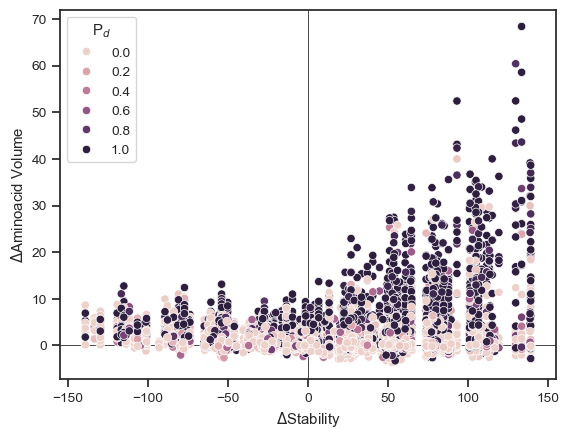

In [50]:
sns.set(style='ticks', font_scale=0.9)
#sns.set_context("talk")
g = sns.scatterplot(x="DVol", y="FloatStability", data=df, hue="P")# , size="" )#, legend="full")
g.set_xlim(-155,155)
g.set(xlabel ="$\Delta$Stability", ylabel = "$\Delta$Aminoacid Volume", title ='')
g.legend(title='P$_d$', loc='upper left')
g.axvline(x=0, c='black', linestyle='solid', zorder=0, linewidth=0.5)
g.axhline(y=0, c='black', linestyle='solid', zorder=0, linewidth=0.5)
#g.axvline(x=-1, c='red', linestyle='dashed', zorder=0)
#g.axhline(y=0.5, c='black', linestyle='solid', zorder=0)
g.set_rasterized(True)
plt.savefig("./FIGUREs/Stability_Vol_ProbDel.png")
plt.savefig("./FIGUREs/Stability_Vol_ProbDel.eps")

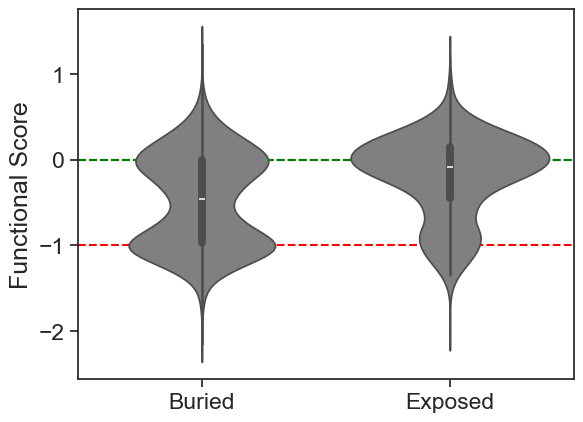

In [52]:
sns.set(style='ticks', font_scale=1.5)
g = sns.violinplot(x ="RSA", y ="Score", data = df, order=["Buried", "Exposed"], color="grey" )
g.axhline(y=0, c='black', linestyle='dashed', zorder=0)
g.set(ylabel ="Functional Score", xlabel ='')
g.axhline(y=0, c='green', linestyle='dashed', zorder=0)
g.axhline(y=-1, c='red', linestyle='dashed', zorder=0)
g.set_rasterized(True)
plt.savefig("./FIGUREs/Score_RSA.png")
plt.savefig("./FIGUREs/Score_RSA.eps")

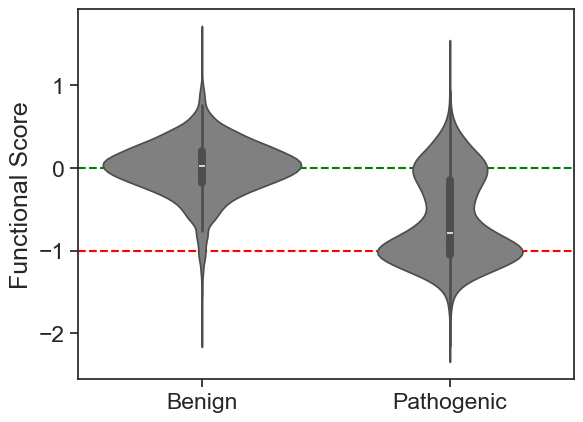

In [54]:
sns.set(style='ticks', font_scale=1.5)
g = sns.violinplot(x ="alphaMiss", y ="Score", data = df, order=["Benign", "Pathogenic"], color="grey" )
g.set (ylabel='Functional Score',xlabel = '') #"Probability of Deleterious Variant (Pd)")
g.axhline(y=0, c='green', linestyle='dashed', zorder=0)
g.axhline(y=-1, c='red', linestyle='dashed', zorder=0)
g.set_rasterized(True)
plt.savefig("./FIGUREs/Score_alphaMissense.png")
plt.savefig("./FIGUREs/Score_alphaMissense.eps")

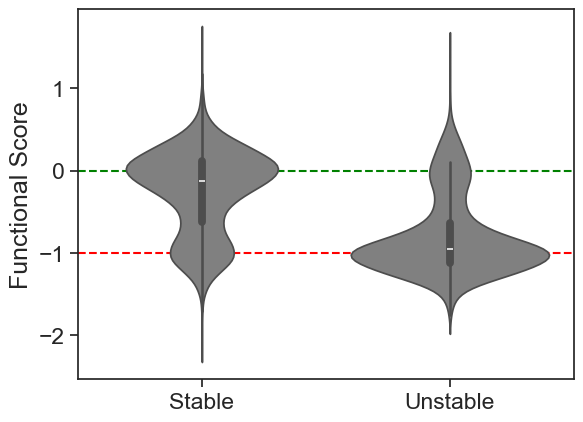

In [56]:
g = sns.violinplot(x ="Stability", y ="Score", data = df, order=["Stable", "Unstable"], color="grey" )
g.set (xlabel='',ylabel = "Functional Score")
g.axhline(y=0, c='green', linestyle='dashed', zorder=0)
g.axhline(y=-1, c='red', linestyle='dashed', zorder=0)
g.set_rasterized(True)
plt.savefig("./FIGUREs/Score_Stability.png")
plt.savefig("./FIGUREs/Score_Stability.eps")


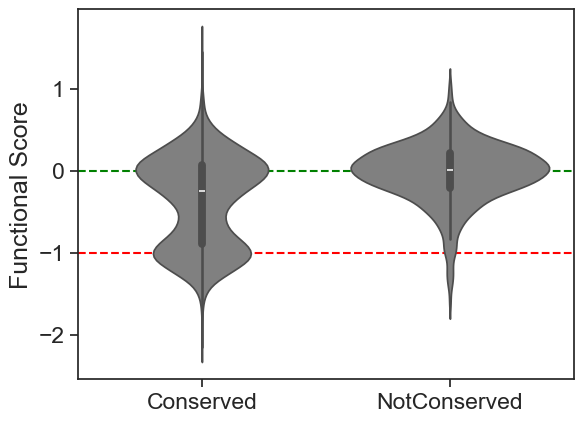

In [58]:
g = sns.violinplot(x ="EvolCon", y ="Score", data = df, order=["Conserved", "NotConserved"], color="grey" )
g.set (xlabel='',ylabel = "Functional Score")
g.axhline(y=0, c='green', linestyle='dashed', zorder=0)
g.axhline(y=-1, c='red', linestyle='dashed', zorder=0)
g.set_rasterized(True)
#plt.savefig("./FIGUREs/Score_Stability.png")
#plt.savefig("./FIGUREs/Score_Stability.eps")
plt.show()

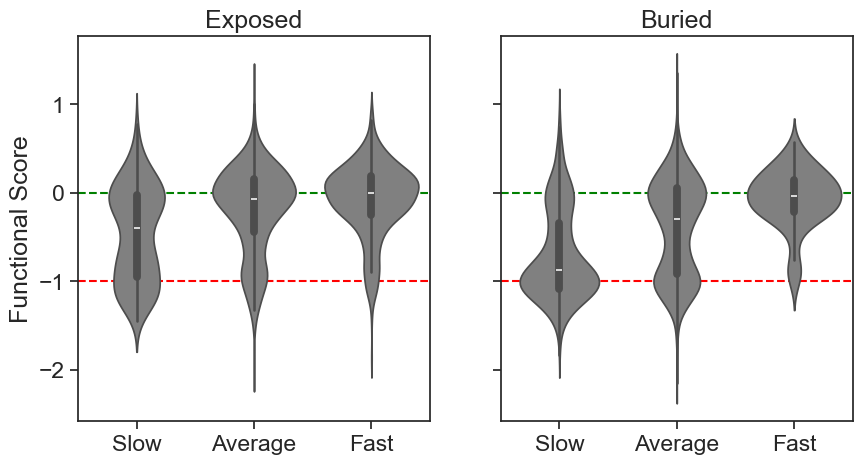

In [62]:

f,(ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
filtered_exposed = df.loc[df['RSA'] == 'Exposed']
filtered_buried = df.loc[df['RSA'] == 'Buried']

sns.violinplot(ax=ax1, x ="EvolRate", y ="Score", data = filtered_exposed, order=["Slow", "Average", "Fast"], color="grey" )
ax1.set (xlabel='',ylabel = "Functional Score")
ax1.set_title('Exposed')
ax1.axhline(y=0, c='green', linestyle='dashed', zorder=0)
ax1.axhline(y=-1, c='red', linestyle='dashed', zorder=0)
ax1.set_rasterized(True)
#plt.setp(ax1.get_legend().get_texts(), fontsize='5') # for legend text
#plt.setp(ax1.get_legend().get_title(), fontsize='6') # for legend title
#plt.savefig("./FIGUREs/Score_EvolRate.png")
#plt.savefig("./FIGUREs/Score_EvolRate.eps")
#plt.show()

sns.violinplot(ax=ax2, x ="EvolRate", y ="Score", data = filtered_buried, order=["Slow", "Average", "Fast"], color="grey" )
ax2.set (xlabel='',ylabel = "Functional Score")
ax2.set_title('Buried')
ax2.axhline(y=0, c='green', linestyle='dashed', zorder=0)
ax2.axhline(y=-1, c='red', linestyle='dashed', zorder=0)
ax2.set_rasterized(True)
#plt.setp(ax2.get_legend().get_texts(), fontsize='5') # for legend text
#plt.setp(ax2.get_legend().get_title(), fontsize='6') # for legend title
plt.savefig("./FIGUREs/Score_EvolRate.png")
plt.savefig("./FIGUREs/Score_EvolRate.eps")
#plt.show()

#### Checking residues in PyMol

In [210]:
filtered_exposed_slow = filtered_exposed.loc[filtered_exposed['EvolRate'] == 'Slow']
t = filtered_exposed_slow[filtered_exposed_slow["P"]>=0.95]
filtered_exposed_slow = t
es = list(filtered_exposed_slow['ID'])
res={}
for i in range(len(es)):
    if int(es[i].split("_")[1]) in res:
        res[int(es[i].split("_")[1])] = int(res[int(es[i].split("_")[1])]) +1 
    else:
        res[int(es[i].split("_")[1])] = 0.0

o=[]
for i in res.items():
    o.append(str(i[0]))
out = '+'.join(o)
print(out)
with open('script_pymol.pml', 'w') as f:
    f.write('fetch 7jsk\n')
    f.write('set cartoon_cylindrical_helices, 1\n')
    f.write('as cartoon\n')
    f.write('bg_color grey')
    f.write('sel ca, chain A\n')
    f.write('sel cb, chain B\n')
    f.write('color cyan, cb\n')
    f.write('sel del, resi %s\n' %  out )
    f.write('color red, del\n')
    f.write('show spheres, del\n')
    f.write('hide licorice\n')
    f.close()
#os.system('./Applications/PyMOL.app/Contents/bin/pymol script_pymol.pml')

51+52+53+142+146+150+259+310+504+506+509+512+513+518


In [208]:
filtered_exposed_slow[filtered_exposed_slow["P"]>=0.95]

,ID,RSA,P,Stability,FloatStability,EvolCon,alphaMiss,Score,ScoreSE,DVol,EvolRate
818,T_51_D,Exposed,0.9866,Stable,0.9883,Conserved,Pathogenic,-0.9008,0.2322,-5.0,Slow
819,T_51_E,Exposed,0.9993,Stable,0.4550,Conserved,Pathogenic,-1.1196,0.1531,22.3,Slow
824,T_51_K,Exposed,0.9998,Stable,-0.4159,Conserved,Pathogenic,-1.2353,0.1162,52.5,Slow
829,T_51_R,Exposed,0.9816,Stable,-0.0408,Conserved,Uncertain,-0.8157,0.0836,57.3,Slow
839,E_52_I,Exposed,0.9993,Stable,1.8172,Conserved,Pathogenic,-1.2188,0.2655,28.3,Slow
...,...,...,...,...,...,...,...,...,...,...,...
8304,I_513_R,Exposed,0.9992,Stable,1.0621,Conserved,Pathogenic,-1.3420,0.4106,6.7,Slow
8305,I_513_S,Exposed,0.9994,Stable,2.5264,Conserved,Pathogenic,-1.1684,0.1928,-77.7,Slow
8307,I_513_W,Exposed,1.0000,Stable,1.0570,Conserved,Pathogenic,-1.4386,0.0614,61.1,Slow
8377,G_518_F,Exposed,0.9961,Stable,4.1503,Conserved,Pathogenic,-1.0740,0.2987,129.8,Slow


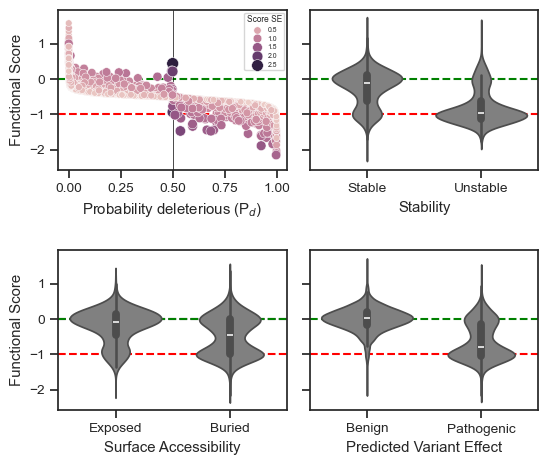

In [1139]:
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(6, 5), sharey=True)
#fig.suptitle('')

#sns.set(style='ticks', font_scale=0.9)
#sns.set_context("talk")
sns.scatterplot(ax=ax1, x="P", y="Score", data=df, hue="ScoreSE", size="ScoreSE" )#, legend="full")
ax1.set(ylabel ="Functional Score", xlabel = "Probability deleterious (P$_d$)", title ='')
ax1.legend(title='Score SE', loc='upper right', fontsize=4.0)
ax1.axhline(y=0, c='green', linestyle='dashed', zorder=0)
ax1.axhline(y=-1, c='red', linestyle='dashed', zorder=0)
ax1.axvline(x=0.5, c='black', linestyle='solid', zorder=0, linewidth=0.5)
ax1.set_rasterized(True)
#plt.savefig("./FIGUREs/Score_ProbDel.png")
#plt.savefig("./FIGUREs/Score_ProbDel.eps")
plt.setp(ax1.get_legend().get_texts(), fontsize='5') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='6') # for legend title


#sns.set(style='ticks', font_scale=1.5)
sns.violinplot(ax=ax3, x ="RSA", y ="Score", data = df, order=["Exposed","Buried"], color="grey" )
ax3.axhline(y=0, c='black', linestyle='dashed', zorder=0)
ax3.set(ylabel ="Functional Score", xlabel ='Surface Accessibility')
ax3.axhline(y=0, c='green', linestyle='dashed', zorder=0)
ax3.axhline(y=-1, c='red', linestyle='dashed', zorder=0)
ax3.set_rasterized(True)
#plt.savefig("./FIGUREs/Score_RSA.png")
#plt.savefig("./FIGUREs/Score_RSA.eps")

#sns.set(style='ticks', font_scale=1.5)
sns.violinplot(ax=ax4, x ="alphaMiss", y ="Score", data = df, order=["Benign", "Pathogenic"], color="grey" )
ax4.set (ylabel='Functional Score',xlabel = 'Predicted Variant Effect') #"Probability of Deleterious Variant (Pd)")
ax4.axhline(y=0, c='green', linestyle='dashed', zorder=0)
ax4.axhline(y=-1, c='red', linestyle='dashed', zorder=0)
ax4.set_rasterized(True)
#plt.savefig("./FIGUREs/Score_alphaMissense.png")
#plt.savefig("./FIGUREs/Score_alphaMissense.eps")

sns.violinplot(ax=ax2, x ="Stability", y ="Score", data = df, order=["Stable", "Unstable"], color="grey" )
ax2.set (xlabel='Stability',ylabel = "Functional Score")
ax2.axhline(y=0, c='green', linestyle='dashed', zorder=0)
ax2.axhline(y=-1, c='red', linestyle='dashed', zorder=0)
ax2.set_rasterized(True)
#plt.savefig("./FIGUREs/Score_Stability.png")
#plt.savefig("./FIGUREs/Score_Stability.eps")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1,hspace=0.5)

plt.savefig("./FIGUREs/Score_summary.png")
plt.savefig("./FIGUREs/Score_summary.eps")


In [1033]:
import pandas as pd
from scipy import stats
csf = df[df["RSA"] != "ND"]
pd.crosstab(csf['Stability'], csf['RSA'])


RSA,Buried,Exposed
Stability,,
Stable,2952,2823
Unstable,737,67


In [1035]:
crosstab = pd.crosstab(csf['Stability'], csf['RSA'])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=469.48272105456635, pvalue=4.152718852646746e-104, dof=1, expected_freq=array([[3238.17829457, 2536.82170543],
       [ 450.82170543,  353.17829457]]))

### Calculating accuracy from citrate transport versus probability of deleterious variant

In [1212]:
with open('./DATA/validation_variants_citTransp_probDel.txt', 'r') as f:
    o = f.read()
    f.close()
t = o.split('\n')
t[0]

d = {}
d['ID'] = list()
d['cit'] = list()
d['p'] = list()

for i in range(len(t)):
    if t[i]:
        r = t[i].split()
        d['ID'].append(r[0])
        d['cit'].append(r[1])
        if float(r[2]) >=0.5:
            d['p'].append('Del')
        else:
            d['p'].append('Neu')
                    
# Create DataFrame
dcit_pdel = pd.DataFrame(d)
ctable = pd.crosstab(dcit_pdel['cit'], dcit_pdel['p'])


In [1214]:
ctable

p,Del,Neu
cit,,
No,18,4
Yes,3,13


In [1224]:
# acc = ( TN + TP ) / ( P + N )
acc = ( ctable['Del']['No'] + ctable['Neu']['Yes'] ) / (ctable['Del'].sum() + ctable['Neu'].sum())
acc

0.8157894736842105

### Calculating accuracy from citrate transport versus AlphaMissense

In [1229]:
with open('./DATA/validation_variants_citTransp_alphaMissense.txt', 'r') as f:
    o = f.read()
    f.close()
t = o.split('\n')
t[0]

d = {}
d['ID'] = list()
d['cit'] = list()
d['alpha'] = list()

for i in range(len(t)):
    if t[i]:
        r = t[i].split()
        if r[3] != 'ambiguous':
            d['ID'].append(r[0])
            d['cit'].append(r[1])
            d['alpha'].append(r[3])
                    
# Create DataFrame
dcit_alpha = pd.DataFrame(d)
atable = pd.crosstab(dcit_alpha['cit'], dcit_alpha['alpha'])


In [1231]:
atable

alpha,likely_benign,likely_pathogenic
cit,,
No,1,17
Yes,15,1


In [1233]:
# acc = ( TN + TP ) / ( P + N )
acc = ( atable['likely_pathogenic']['No'] + atable['likely_benign']['Yes'] ) / (atable['likely_benign'].sum() + atable['likely_pathogenic'].sum())
acc

0.9411764705882353

## Comparing the score of pathogenic versus a random sample of variants.

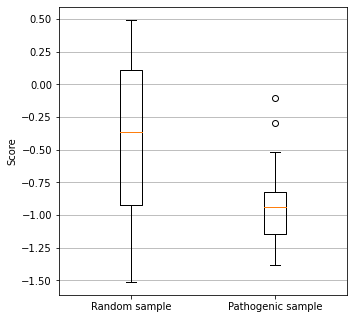

In [22]:
# read pathogenic variants from patients annotations
import random
ifile = '/Users/eferrada/Downloads/ENRICH/13A5/M6_DATA/ANALYSIS/PATHOGENIC/pathogenic.txt'
with open ( ifile, 'r') as f:
    o = f.read()
    f.close()
t = o.split('\n')

pathogenic_sample = []
for i in range(len(t)):
    if t[i]:
        if t[i].split('.')[1] in s1:
            pathogenic_sample.append((-1)*float(s1[t[i].split('.')[1]]))

sample_size = len(pathogenic_sample)
keys = random.sample(list(s1), sample_size)
random_sample = []
for i in range(len(keys)):
    if keys[i]:
        if keys[i] in s1:
            random_sample.append((-1)*float(s1[keys[i]]))

data = [np.array(random_sample), np.array(pathogenic_sample)] 
fig = plt.figure(figsize =(4, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
ax.set_xticklabels(['Random sample', 'Pathogenic sample'])
ax.set_ylabel('Score')
plt.grid(axis='y')

# show plot
plt.show()

## Comparing Cit binding residues

In [24]:
# read pathogenic variants from patients annotations
import random

binding_sample = [ 227, 228, 141, 142, 465, 464, 508]
random_sample = random.sample([1:1:568], len(binding_sample))

sample_size = len(pathogenic_sample)
keys = random.sample(list(s1), sample_size)
random_sample = []
for i in range(len(keys)):
    if keys[i]:
        if keys[i] in s1:
            random_sample.append((-1)*float(s1[keys[i]]))

data = [np.array(random_sample), np.array(pathogenic_sample)] 
fig = plt.figure(figsize =(4, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
ax.set_xticklabels(['Random sample', 'Pathogenic sample'])
ax.set_ylabel('Score')
# show plot
plt.show()

SyntaxError: invalid syntax (2632005044.py, line 5)

/Users/eferrada/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


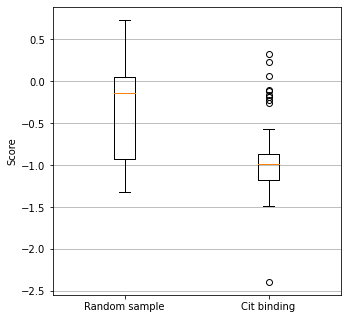

In [25]:
binding_sample = [ 227, 228, 141, 142, 465, 464, 508]
sites = [i for i in range(1, 568+1)]
random_sample = random.sample(sites, len(binding_sample))
random_sample


binding=[]
for i in range(len(binding_sample)):
    if binding_sample[i]:
        for m,n in s1.items():
            name = str(m)
            if int(''.join(list(name)[3:-3])) == binding_sample[i]:
                binding.append((-1)*float(n))
                
sample = []
for i in range(len(random_sample)):
    if random_sample[i]:
        for m,n in s1.items():
            name = str(m)
            if int(''.join(list(name)[3:-3])) == random_sample[i]:
                sample.append((-1)*float(n))

data = [np.array(sample), np.array(binding)] 
fig = plt.figure(figsize =(4, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
ax.set_xticklabels(['Random sample', 'Cit binding'])
ax.set_ylabel('Score')
# show plot
plt.grid(axis='y')
plt.show()